In [112]:
import eikon as ek
import pandas as pd

# Set up the Eikon API and fetch the data
ek.set_app_key('a3f7fdd44eaf4366adf2fe0487a6191dd8a5fffb')
# Access data directly from Eikon (LSEG Workspace):
# Step 1: Grab constitutes from the FTSE 100 Index
# Step 2: Define the fields we want to fetch using 'TR'
df, err = ek.get_data(['JD.L','SMT.L','FCIT.L','LMPL.L','PSHP.L','DPLM.L','SGE.L','RIO.L','UU.L',
                       'FRES.L','ALWA.L','CPG.L','BT.L','UTG.L','ABF.L','PHNX.L','SSE.L','GAW.L',
                       'WTB.L','ICGIN.L','DGE.L','BNZL.L','HWDN.L','SPX.L','ANTO.L','SDR.L','RKT.L',
                       'BKGH.L','AAF.L','BLND.L','MKS.L','LSEG.L','AHT.L','HRGV.L','BTRW.L','RR.L','CRDA.L',
                       'KGF.L','ITRK.L','III.L','MNG.L','DCC.L','BAES.L','CTEC.L','SMIN.L','SGRO.L','EXPN.L',
                       'CNA.L','NXT.L','IHG.L','HLMA.L','AAL.L','LAND.L','EZJ.L','HSBA.L','AUTOA.L',
                       'ADML.L','SVT.L','MRON.L','WEIR.L','INF.L','RMV.L','AV.L','TSCO.L','PSN.L','SMDS.L',
                       'HLN.L','WPP.L','BEZG.L','SJP.L','ENT.L','VOD.L','NWG.L','TW.L','GSK.L','LGEN.L','REL.L',
                       'RTO.L','PRU.L','LLOY.L','GLEN.L','ULVR.L','BARC.L','BATS.L','BP.L','SHEL.L','MNDI.L',
                       'SN.L','SBRY.L','PSON.L','IMB.L','NG.L','CCH.L','IMI.L','ICAG.L','HSX.L','AZN.L','EDV.L','STAN.L','HIK.L'],
                      ['TR.CommonName','TR.Ticker','TR.TRESGCScore.date', 'TR.TRESGScore', 'TR.EnvironmentPillarScore', 'TR.SocialPillarScore',
                       'TR.GovernancePillarScore','TR.TRESGScoreGrade','TR.TRESGCScoreGrade','TR.EnvironmentPillarScoreGrade','TR.SocialPillarScoreGrade',
                       'TR.GovernancePillarScoreGrade','TR.PriceClose','TR.EPSMean',
                       'TR.PE','TR.F.DebtLTTot(Scale=9)','TR.CompanyMarketCap(Scale=9)','TR.TRBCEconomicSector',],
                      {'SDate': 0, 'EDate': -9,}) # Grabs data from the past 10 years

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter out rows where the year is 2013
df_filtered = df[df['Date'].dt.year != 2013]

# Save the filtered DataFrame back to a new CSV file
df_filtered.to_csv('FTSE.csv', index=False)

/Applications/anaconda3/lib/python3.12/site-packages/eikon/data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [120]:
# Import data into a DataFrame from csv file 'FTSE_data.csv' using Pandas library
import pandas as pd
df=pd.read_csv('FTSE.csv')

df.dropna().round(2)

,Instrument,Company Common Name,Date,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,ESG Score Grade,ESG Combined Score Grade,Environmental Pillar Score Grade,Social Pillar Score Grade,Governance Pillar Score Grade,Price Close,Earnings Per Share - Mean,P/E (Daily Time Series Ratio),Debt - Long-Term - Total,Company Market Cap,TRBC Economic Sector Name
0,JD.L,JD Sports Fashion PLC,2023-01-28 00:00:00+00:00,33.76,62.77,38.16,14.46,C,C-,B,C,D,87.36,0.12,14.06,2.10,4.53,Consumer Cyclicals
30,LMPL.L,LondonMetric Property PLC,2023-03-31 00:00:00+00:00,40.20,48.51,49.68,21.59,C,C,C+,C+,D+,180.90,0.13,16.32,2.08,3.71,Real Estate
40,PSHP.L,Pershing Square Holdings Ltd,2023-12-31 00:00:00+00:00,45.52,10.49,59.36,42.30,C+,C+,D,B,C+,4202.00,6.32,4.38,2.35,8.84,Financials
50,DPLM.L,Diploma PLC,2023-09-30 00:00:00+00:00,32.43,18.95,37.68,41.76,C-,C-,D+,C,C+,4296.00,1.60,44.69,0.54,5.76,Industrials
60,SGE.L,Sage Group PLC,2023-09-30 00:00:00+00:00,52.17,45.75,66.56,41.75,B-,B-,C+,B,C+,1306.50,0.43,41.44,1.23,13.10,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,ICAG.L,International Consolidated Airlines Group SA,2023-12-31 00:00:00+00:00,69.78,72.30,53.11,91.55,B+,C+,B+,B-,A,312.60,0.54,7.42,13.10,15.14,Industrials
947,HSX.L,Hiscox Ltd,2023-12-31 00:00:00+00:00,59.41,39.99,41.20,91.89,B,B,C,C,A+,1077.00,1.70,6.36,0.73,3.66,Financials
957,AZN.L,AstraZeneca PLC,2023-12-31 00:00:00+00:00,94.37,90.95,96.89,92.43,A+,B,A,A+,A+,10844.00,8.13,31.91,23.22,168.16,Healthcare
977,STAN.L,Standard Chartered PLC,2023-12-31 00:00:00+00:00,90.83,79.32,91.19,94.89,A,B-,A-,A,A+,1067.00,1.57,8.72,77.24,25.83,Financials


In [71]:
# Check to see that there are 100 total unique companies in dataset
df['Instrument'].nunique()

100

In [128]:
# Convert the Date column into a yearly date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year #Adds the year column
df.dropna()

,Instrument,Company Common Name,Date,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,ESG Score Grade,ESG Combined Score Grade,Environmental Pillar Score Grade,Social Pillar Score Grade,Governance Pillar Score Grade,Price Close,Earnings Per Share - Mean,P/E (Daily Time Series Ratio),Debt - Long-Term - Total,Company Market Cap,TRBC Economic Sector Name,ESG Score Change,Year
140,ABF.L,Associated British Foods PLC,2023-09-16 00:00:00+00:00,65.090899,85.965777,59.209133,52.290915,B,C+,A,B,B-,1968.0,1.886019,10.147730,3.2520,14.348289,Consumer Non-Cyclicals,-3.581315,2023
558,ADML.L,Admiral Group PLC,2023-12-31 00:00:00+00:00,56.154318,77.834740,36.434049,73.663703,B-,B-,A-,C,B+,2630.0,1.729963,20.095357,0.8606,8.056503,Financials,-2.684356,2023
318,AHT.L,Ashtead Group PLC,2023-04-30 00:00:00+00:00,55.192159,38.897913,56.331618,65.142156,B-,B-,C,B-,B,5184.0,3.681790,17.999096,10.4019,22.617635,Industrials,6.003516,2023
239,ANTO.L,Antofagasta PLC,2023-12-31 00:00:00+00:00,70.815750,69.487255,79.186816,59.000677,B+,B+,B+,A-,B,1738.0,0.692130,25.611207,3.1773,17.135657,Basic Materials,-3.200950,2023
548,AUTOA.L,Auto Trader Group PLC,2023-03-31 00:00:00+00:00,59.240707,65.083277,41.572613,72.679367,B,B,B,C,B+,796.0,0.319802,25.774698,0.0301,7.073382,Technology,-2.564663,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,UU.L,United Utilities Group PLC,2023-03-31 00:00:00+00:00,68.428331,78.544495,75.195158,43.073067,B+,C+,A-,A-,C+,990.0,0.490929,59.771780,9.3458,6.751274,Utilities,-0.889392,2023
707,VOD.L,Vodafone Group PLC,2024-03-31 00:00:00+00:00,82.253794,78.726750,83.340922,82.777565,A-,B,A-,A,A-,69.5,0.079530,8.609486,48.3280,17.671838,Technology,-0.363257,2024
588,WEIR.L,Weir Group PLC,2023-12-31 00:00:00+00:00,72.208919,66.982808,74.156027,75.826433,B+,B+,B+,B+,A-,2278.0,1.153976,26.786764,1.1111,5.914469,Industrials,-3.525580,2023
667,WPP.L,WPP PLC,2023-12-31 00:00:00+00:00,78.319743,67.820621,79.677493,80.031746,A-,A-,B+,A-,A-,731.2,0.864432,39.261168,5.6372,7.888879,Consumer Cyclicals,4.211851,2023


In [75]:
# Print column values
df.columns

Index(['Instrument', 'Company Common Name', 'Date', 'ESG Score',
       'Environmental Pillar Score', 'Social Pillar Score',
       'Governance Pillar Score', 'ESG Score Grade',
       'ESG Combined Score Grade', 'Environmental Pillar Score Grade',
       'Social Pillar Score Grade', 'Governance Pillar Score Grade',
       'Price Close', 'Earnings Per Share - Mean',
       'P/E (Daily Time Series Ratio)', 'Debt - Long-Term - Total',
       'Company Market Cap', 'TRBC Economic Sector Name', 'Year'],
      dtype='object')

In [130]:
# Compute average ESG, E, S, and G scores for each year
mean_scores = df.groupby('Year')[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score']].mean().reset_index()
mean_scores

,Year,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score
0,2014,60.348902,61.151914,59.857970,61.378197
1,2015,61.901452,61.861389,62.965653,62.130017
2,2016,63.039121,62.723150,63.935864,63.193482
3,2017,65.269705,62.946966,67.197430,65.091462
4,2018,65.589576,62.678562,67.937517,65.269466
5,2019,67.562149,64.767193,68.940180,68.310482
6,2020,69.334817,65.947676,70.045032,71.501522
7,2021,70.334390,68.498232,70.184267,72.295760
8,2022,69.552906,68.639793,70.052226,70.040536
9,2023,69.123532,67.729538,69.879095,69.603292


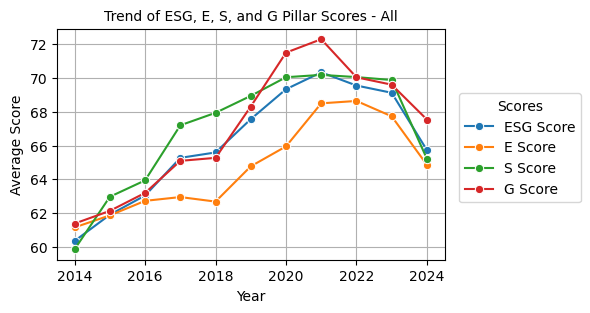

In [63]:
# Plotting the average trend of ESG, E, S, and G scores over time in the FTSE 100
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))

# Plot each score as a separate line in the trend plot
sns.lineplot(data=mean_scores, x='Year', y='ESG Score', label='ESG Score', marker='o')
sns.lineplot(data=mean_scores, x='Year', y='Environmental Pillar Score', label='E Score', marker='o')
sns.lineplot(data=mean_scores, x='Year', y='Social Pillar Score', label='S Score', marker='o')
sns.lineplot(data=mean_scores, x='Year', y='Governance Pillar Score', label='G Score', marker='o')

plt.title('Trend of ESG, E, S, and G Pillar Scores - All', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Scores', bbox_to_anchor=(1.02, 0.75), loc='upper left')
plt.grid(True)
plt.show()

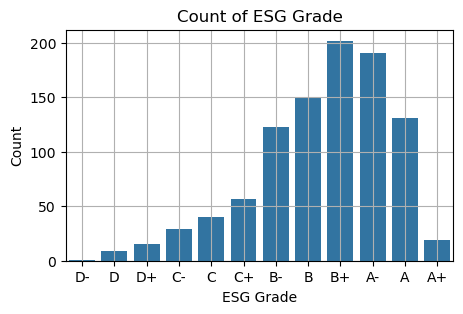

In [31]:
# Plotting the bar plot for ESG grades to visualize number of appearances for grades
plt.figure(figsize=(5, 3))

# Defining a specific order for the ESG grades
grade_order = ['D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']
sns.countplot(data=df, x='ESG Score Grade', order=grade_order)

# Adding labels and title
plt.title('Count of ESG Grade')
plt.xlabel('ESG Grade')
plt.ylabel('Count')
plt.grid(True)
plt.show()

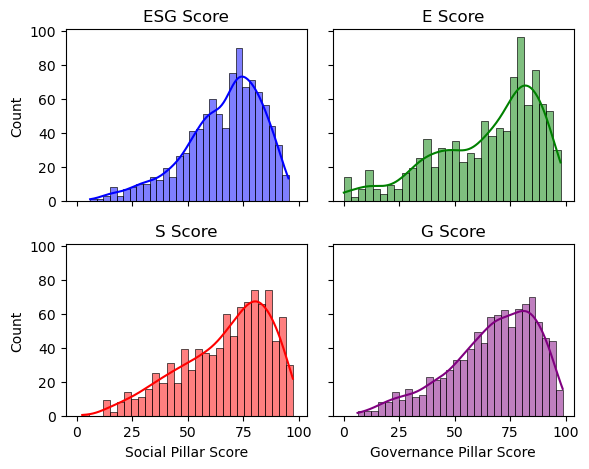

In [29]:
#Plotting empircal distribution of ESG Scores

fig, axes = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

# Plotting each distribution in its own subplot
sns.histplot(df['ESG Score'], bins=30, kde=True, color='blue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('ESG Score')

sns.histplot(df['Environmental Pillar Score'], bins=30, kde=True, color='green', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('E Score')

sns.histplot(df['Social Pillar Score'], bins=30, kde=True, color='red', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('S Score')

sns.histplot(df['Governance Pillar Score'], bins=30, kde=True, color='purple', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('G Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

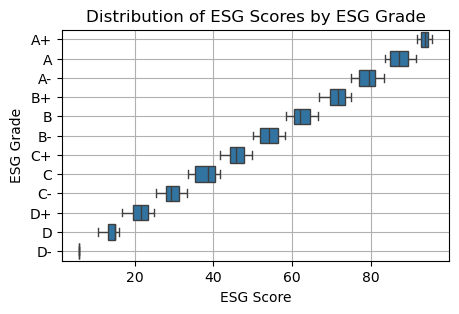

In [35]:
#Comparing distribution of ESG scores across ESG grades

# Defining the specific order for the ESG grades
grade_order = ['D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, y='ESG Score Grade', x='ESG Score', order=grade_order[::-1])
plt.title('Distribution of ESG Scores by ESG Grade')
plt.ylabel('ESG Grade')
plt.xlabel('ESG Score')
plt.grid(True)
plt.show()

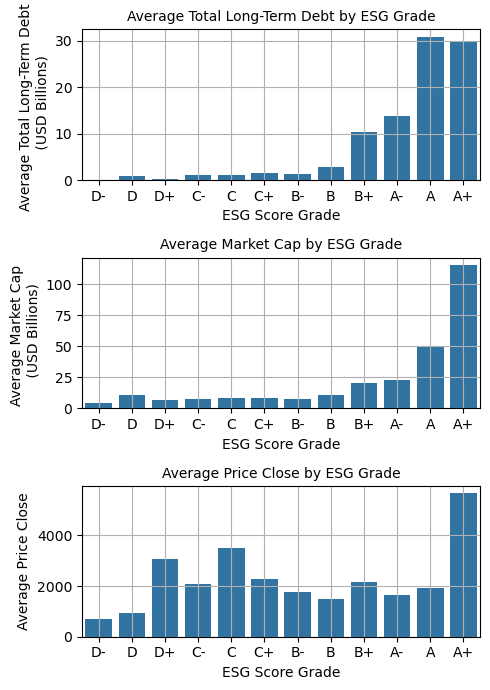

In [81]:
# Defining the specific order for ESG grades from low to high
esg_score_order = ['D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']

# Calculating the mean values of financial variables for each ESG score grades
esg_score_stats = df.groupby('ESG Score Grade')[
    ['Debt - Long-Term - Total','Company Market Cap','Price Close']].mean().reindex(esg_score_order)

fig, axes = plt.subplots(3, 1, figsize=(5, 7))

# I) Bar plot for Debt - Long-Term - Total
sns.barplot(data=esg_score_stats.reset_index(), x='ESG Score Grade', y='Debt - Long-Term - Total', ax=axes[0], order=esg_score_order)
axes[0].set_title('Average Total Long-Term Debt by ESG Grade', fontsize=10)
axes[0].set_ylabel('Average Total Long-Term Debt \n (USD Billions)')
axes[0].grid(True)

# II) Bar plot for Market Capitalization
sns.barplot(data=esg_score_stats.reset_index(), x='ESG Score Grade', y='Company Market Cap', ax=axes[1], order=esg_score_order)
axes[1].set_title('Average Market Cap by ESG Grade', fontsize=10)
axes[1].set_ylabel('Average Market Cap \n (USD Billions)')
axes[1].grid(True)

# III) Bar plot for Price Close
sns.barplot(data=esg_score_stats.reset_index(), x='ESG Score Grade', y='Price Close', ax=axes[2], order=esg_score_order)
axes[2].set_title('Average Price Close by ESG Grade', fontsize=10)
axes[2].set_ylabel('Average Price Close')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [83]:
# Get the names of the economic sectors for companies in the FTSE 100 
df['TRBC Economic Sector Name'].unique()

array(['Consumer Cyclicals', nan, 'Financials', 'Real Estate',
       'Industrials', 'Technology', 'Basic Materials', 'Utilities',
       'Consumer Non-Cyclicals', 'Healthcare', 'Energy'], dtype=object)

In [85]:
# Calculate the average and median ESG scores for each economic sector
sector_stats = df.groupby('TRBC Economic Sector Name')['ESG Score'].agg(['mean', 'median']).round(2)
sector_stats


,mean,median
TRBC Economic Sector Name,,
Basic Materials,77.13,79.10
Consumer Cyclicals,65.52,71.47
Consumer Non-Cyclicals,75.36,78.56
Energy,88.90,88.90
Financials,65.05,69.08
Healthcare,79.26,78.69
Industrials,64.98,70.16
Real Estate,66.03,71.94
Technology,64.31,62.53


In [134]:
# Top 5 Companies with highest ESG improvement
# Sort the DataFrame by Ticker and Year
df = df.sort_values(by=['Instrument', 'Year'])

# Calculate the year-over-year change in ESG Score for each company
df['ESG Score Change'] = df.groupby('Instrument')['ESG Score'].diff()

# Identify the top 5 companies with the largest positive ESG score change
top_5_positive_change = df.nlargest(5, 'ESG Score Change')[['Instrument','Year', 'ESG Score Change']]

top_5_positive_change.reset_index(drop=True)

,Instrument,Year,ESG Score Change
0,ENT.L,2016,34.427022
1,EDV.L,2017,30.860641
2,SBRY.L,2021,23.765326
3,EDV.L,2020,21.343384
4,ICGIN.L,2021,20.645174
